# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


# Loading Datset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Projects/Data/MLNBP8_Loan_status.csv')
df

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.0,31237.0,1598.0,85.0,2.0,53.0,347.0,5.0,1.0,Not Default
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.0,519.0,NaN,1837.0,3526.0,8998.0,129.0,NaN,NaN,Not Default
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,NaN,NaN,22.0,42.0,2.0,31.0,Default
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.0,11855.0,48944.0,859.0,349.0,1178.0,1926.0,52964.0,184.0,Default


In [ ]:
col=[]
for i in df.columns:
  i=i.lower()
  col.append(i.replace(' ','_'))
df.columns=col

In [ ]:
df.iloc[:,:-1]

,id,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.0,31237.0,1598.0,85.0,2.0,53.0,347.0,5.0,1.0
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.0,519.0,NaN,1837.0,3526.0,8998.0,129.0,NaN,NaN
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,NaN,NaN,22.0,42.0,2.0,31.0
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.0,11855.0,48944.0,859.0,349.0,1178.0,1926.0,52964.0,184.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


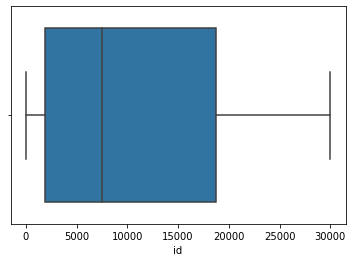

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


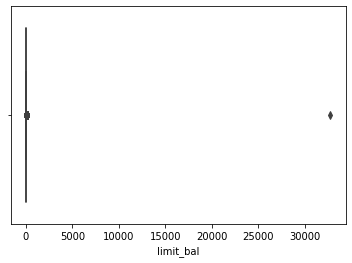

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


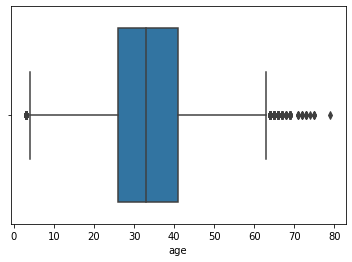

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


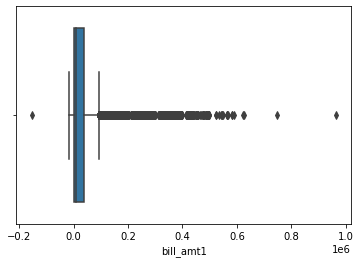

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


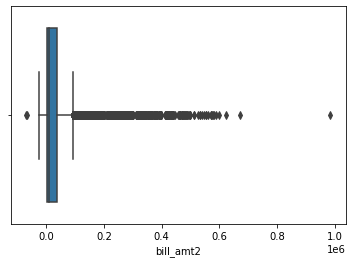

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


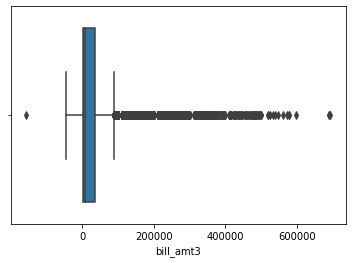

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


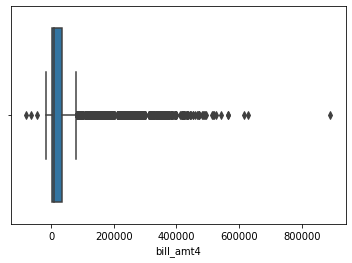

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


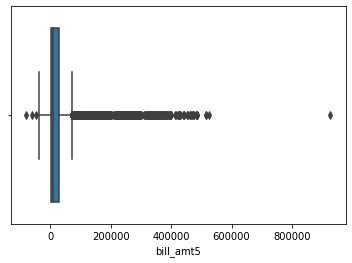

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


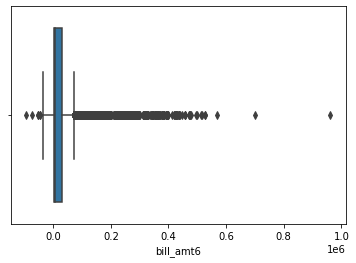

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


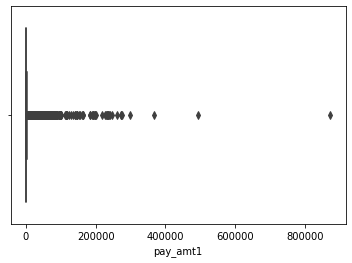

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


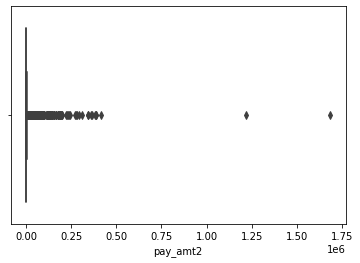

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


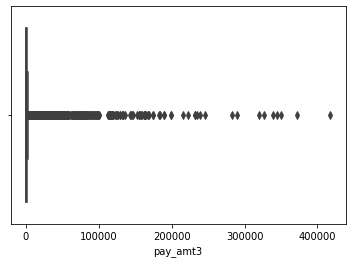

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


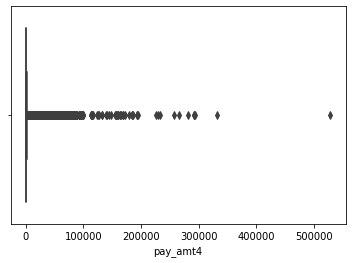

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


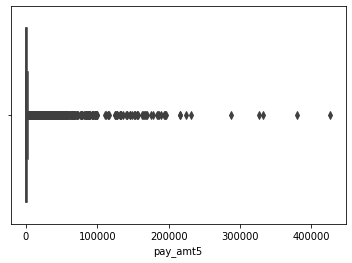

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


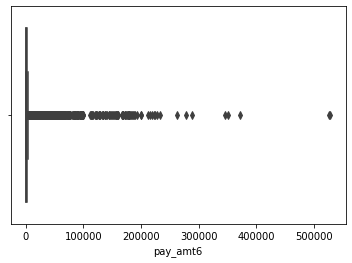

In [ ]:
for i in df.iloc[:,:-1].columns:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
for i in df.columns:
  if df[i].isnull().sum()!=0:
    df[i]=df[i].fillna(df[i].median()).round(2)
df.isnull().sum()


id                0
limit_bal         0
age               0
bill_amt1         0
bill_amt2         0
bill_amt3         0
bill_amt4         0
bill_amt5         0
bill_amt6         0
pay_amt1          0
pay_amt2          0
pay_amt3          0
pay_amt4          0
pay_amt5          0
pay_amt6          0
default_status    0
dtype: int64

In [ ]:
df1=df.drop(['id'],axis=1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


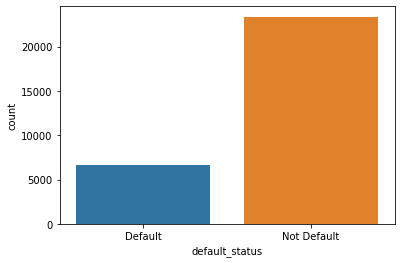

In [ ]:
sns.countplot(df1['default_status'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['default_status']=le.fit_transform(df1['default_status'])
df1

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_status
0,2.0,24,3913.0,312.0,689.0,8671.0,8131.5,7819.0,166.0,689.0,119.0,75.0,75.0,78.0,0
1,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,166.0,1.0,1.0,1.0,75.0,2.0,0
2,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,1
3,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,1
4,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,22.0,39,188948.0,192815.0,28365.0,884.0,31237.0,1598.0,85.0,2.0,53.0,347.0,5.0,1.0,1
29996,15.0,43,1683.0,1828.0,352.0,8979.0,519.0,7819.0,1837.0,3526.0,8998.0,129.0,75.0,78.0,1
29997,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,166.0,164.0,22.0,42.0,2.0,31.0,0
29998,8.0,41,-1645.0,78379.0,7634.0,52774.0,11855.0,48944.0,859.0,349.0,1178.0,1926.0,52964.0,184.0,0


In [ ]:
df1.describe()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_status
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,14.648867,32.427900,32286.844800,31830.264633,30347.853233,28362.403467,26574.523967,25751.501500,2185.646567,2.426552e+03,2094.037067,1785.566367,1803.152733,2003.659667,0.778800
std,189.496507,12.718991,59811.687123,58722.022215,56212.874655,52269.309083,49073.392872,48557.529697,11435.937163,1.678625e+04,11000.990834,9845.622726,9800.383850,11702.103698,0.415062
min,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.000000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,26.000000,1788.000000,1847.750000,1862.000000,1782.000000,1718.000000,1724.000000,21.000000,1.900000e+01,15.000000,13.000000,13.000000,15.000000,1.000000
50%,9.000000,33.000000,8551.500000,8697.500000,8889.500000,8671.000000,8131.500000,7819.000000,166.000000,1.640000e+02,119.000000,75.000000,75.000000,78.000000,1.000000
75%,21.000000,41.000000,33725.000000,33258.000000,29866.000000,28419.500000,26645.750000,25684.250000,1311.000000,1.286000e+03,792.000000,569.000000,541.250000,541.000000,1.000000
max,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000,1.000000


In [ ]:
ix=[]
for cl in df1.columns:
  lr,ur=df1[cl].quantile([0.02,0.98])
  qr=ur-lr
  ul=ur+1.5*qr
  ll=lr-1.5*qr
  ix.extend(df1[(df1[cl]>ul) | (df1[cl]<ll)].index)

In [ ]:
df2=df1.drop(ix)
df2

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_status
0,2.0,24,3913.0,312.0,689.0,8671.0,8131.5,7819.0,166.0,689.0,119.0,75.0,75.0,78.0,0
1,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,166.0,1.0,1.0,1.0,75.0,2.0,0
2,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,1
3,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,1
4,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,8.0,34,72557.0,7778.0,79384.0,77519.0,8267.0,81158.0,7.0,35.0,119.0,7.0,75.0,4.0,0
29995,22.0,39,188948.0,192815.0,28365.0,884.0,31237.0,1598.0,85.0,2.0,53.0,347.0,5.0,1.0,1
29996,15.0,43,1683.0,1828.0,352.0,8979.0,519.0,7819.0,1837.0,3526.0,8998.0,129.0,75.0,78.0,1
29997,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,166.0,164.0,22.0,42.0,2.0,31.0,0


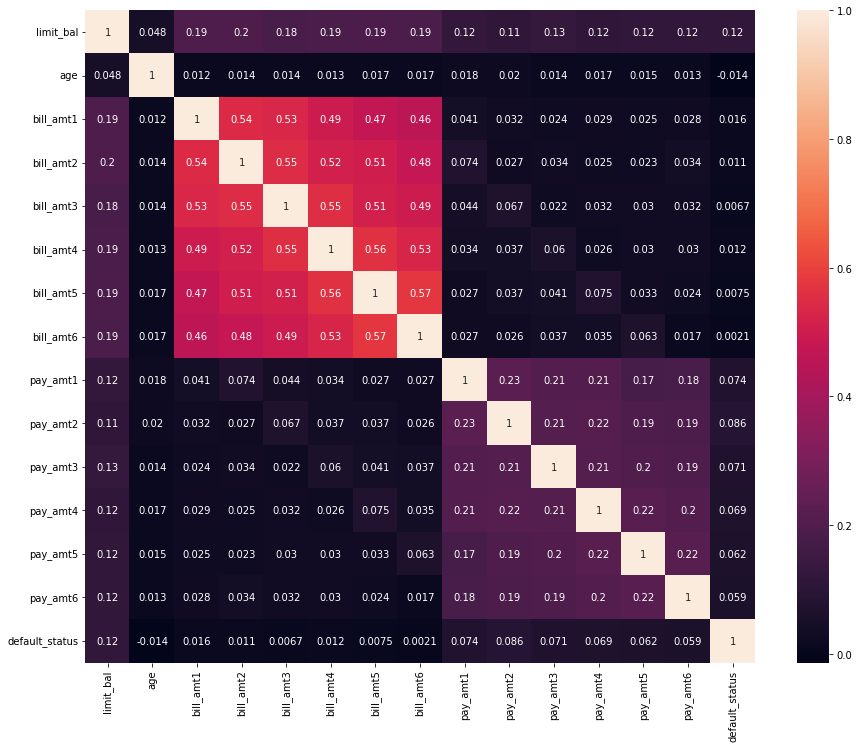

In [ ]:
cor=df2.corr()
plt.figure(figsize=(15,12))
sns.heatmap(cor,annot=True)

In [ ]:
# df3=df2.copy()
# df3['avg_bill']=(df2['bill_amt1']+df2['bill_amt2']+df2['bill_amt3']+df2['bill_amt4']+df2['bill_amt5']+df2['bill_amt6'])/6
# df3['avg_pay']=(df2['pay_amt1']+df2['pay_amt2']+df2['pay_amt3']+df2['pay_amt4']+df2['pay_amt5']+df2['pay_amt6'])/6
# df3=df3[['limit_bal','age','avg_bill','avg_pay','default_status']]
# df3

In [ ]:
df2.default_status.value_counts()

1    22311
0     6500
Name: default_status, dtype: int64

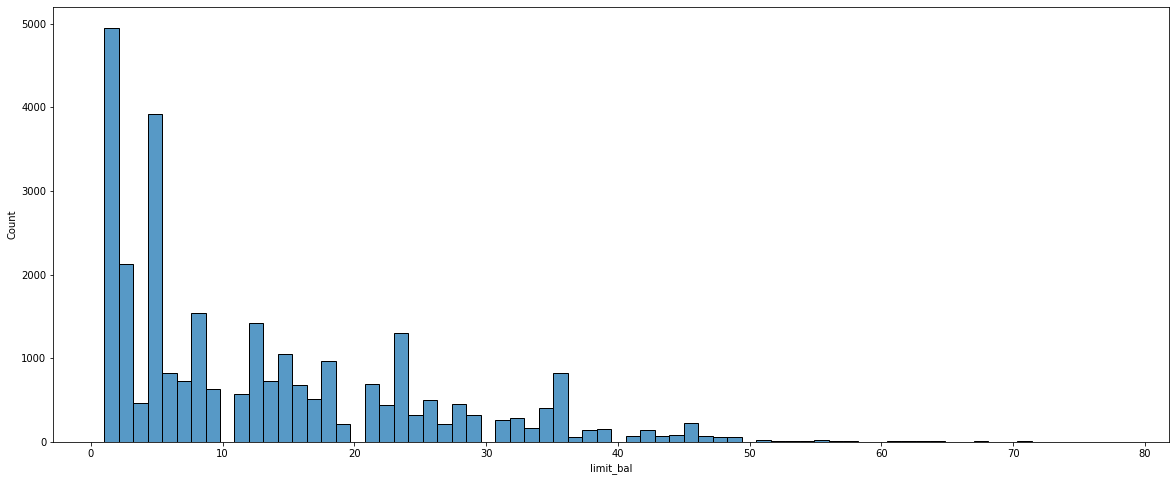

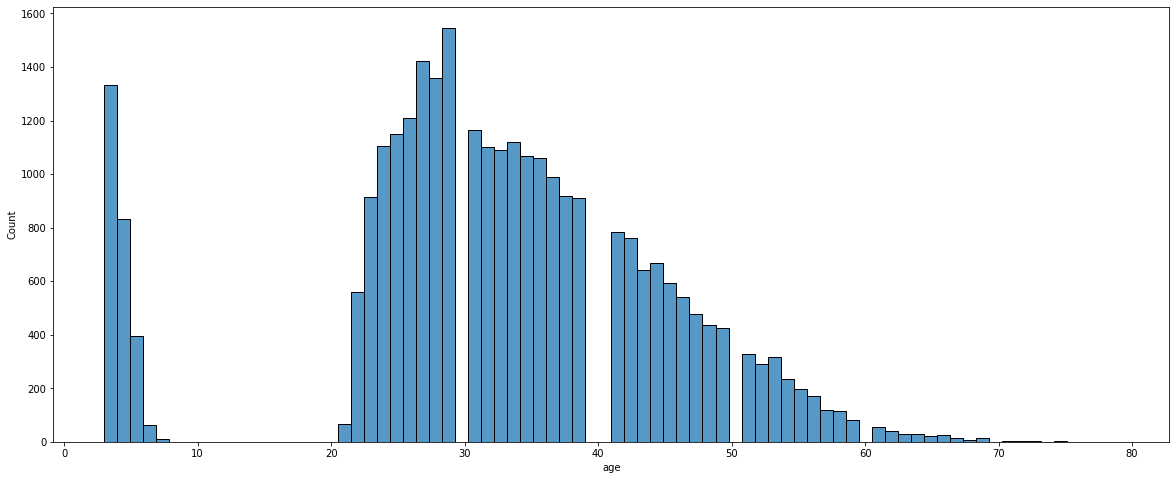

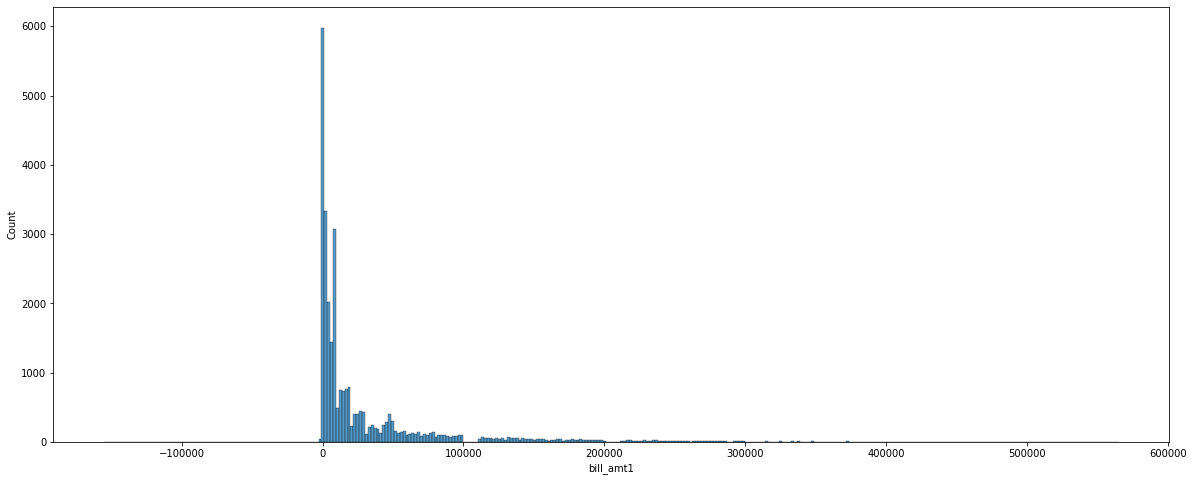

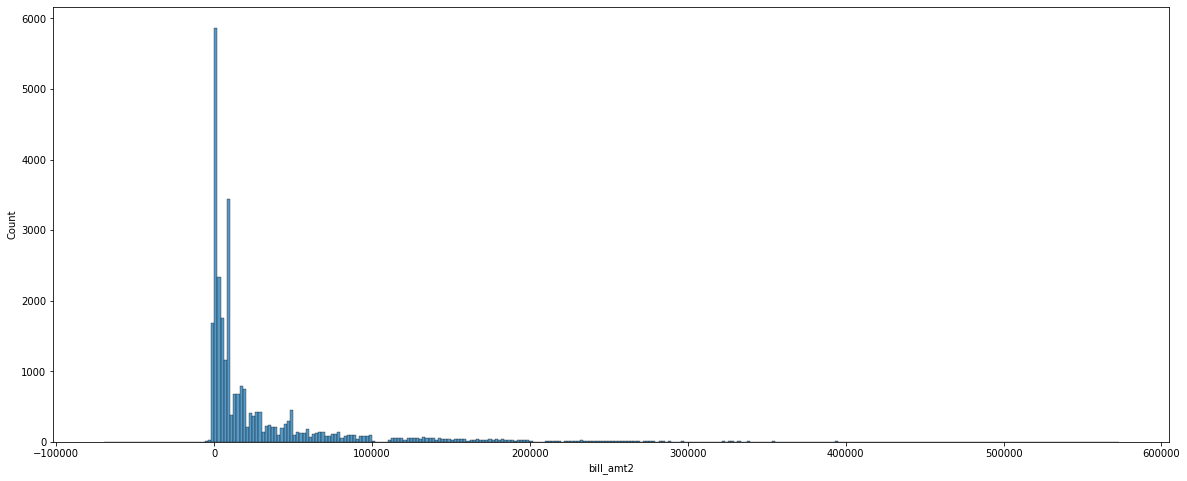

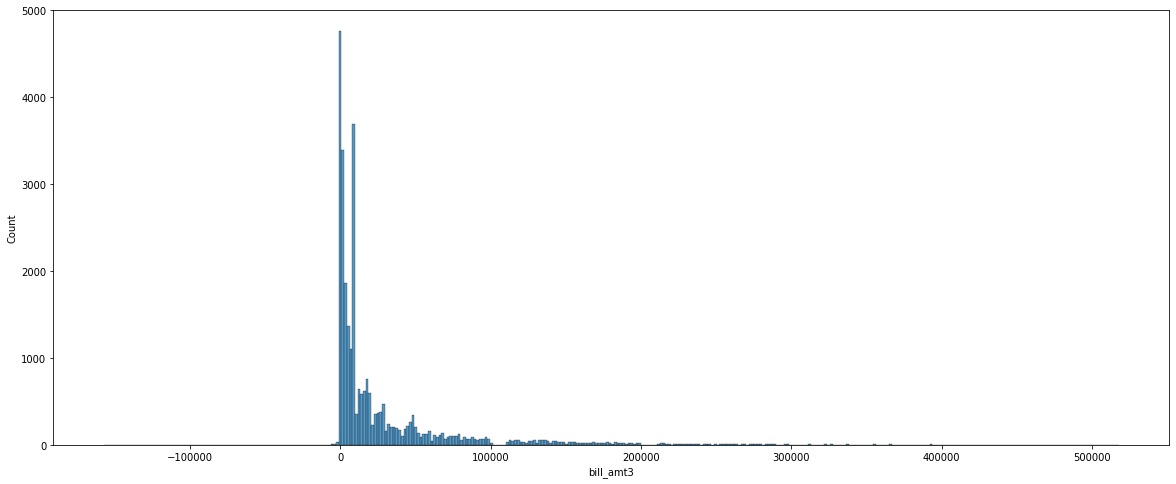

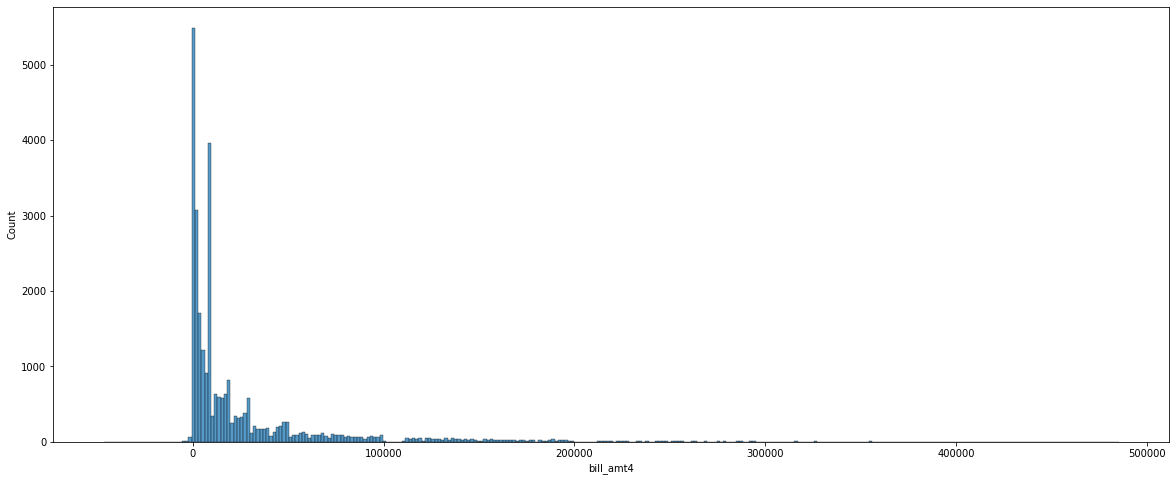

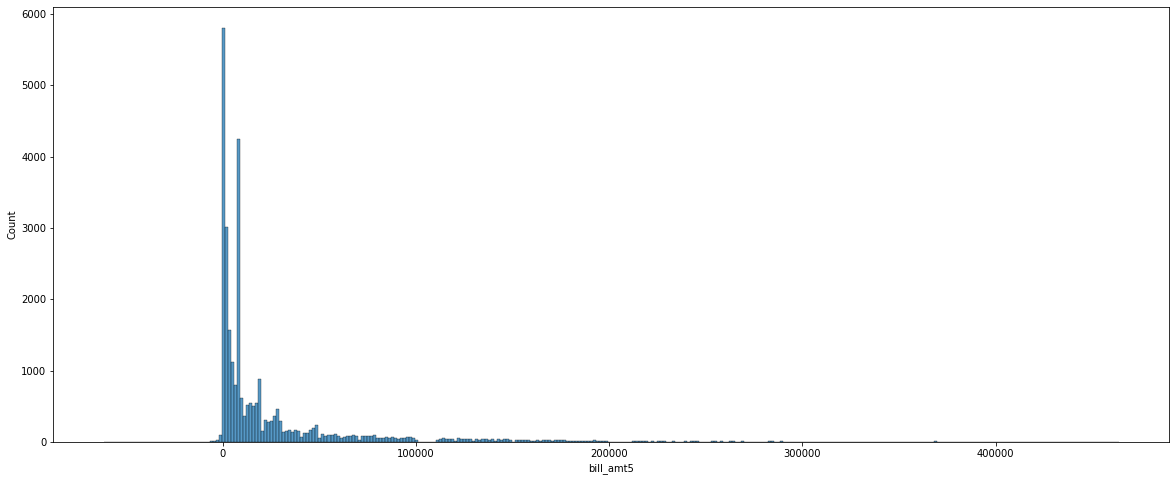

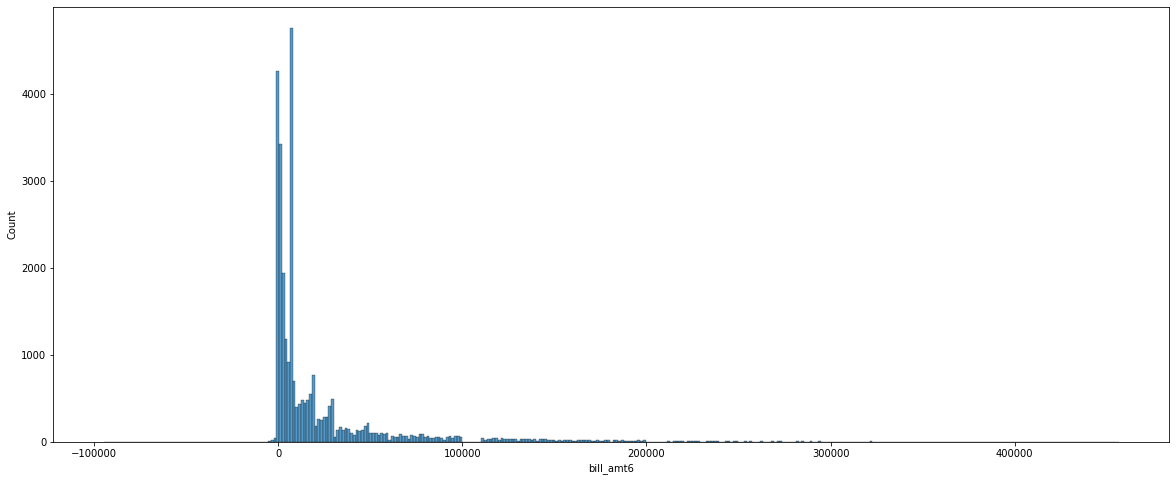

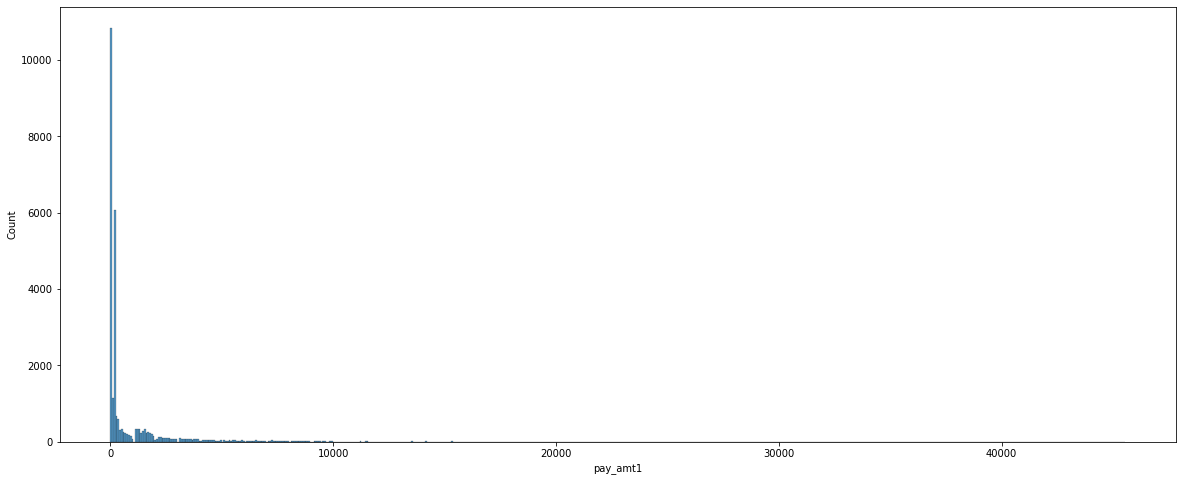

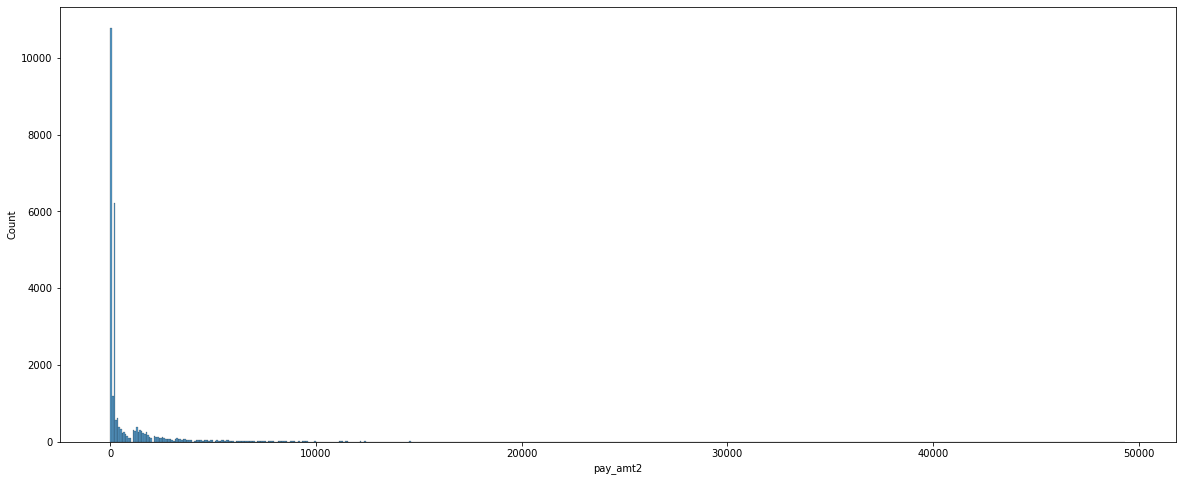

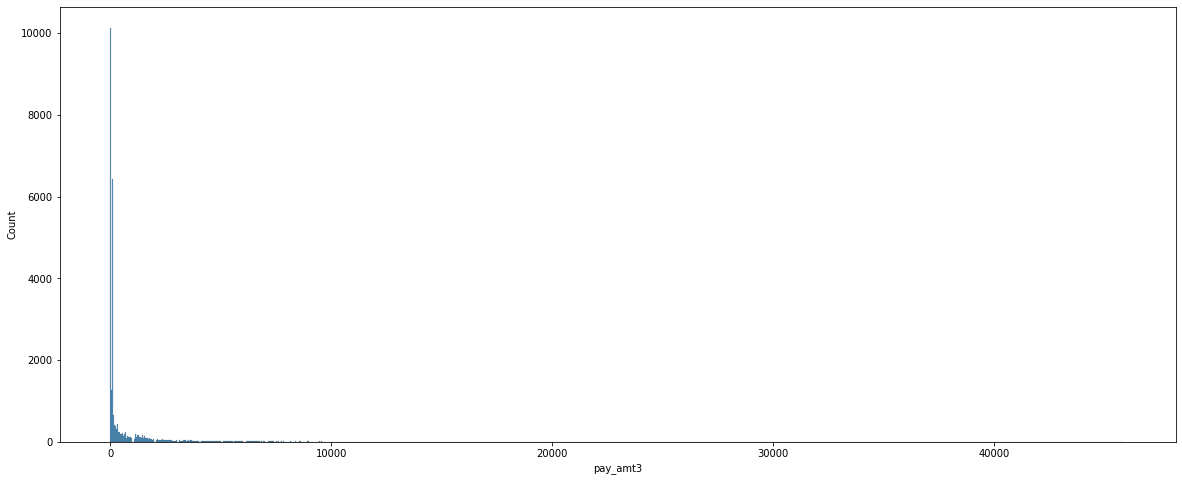

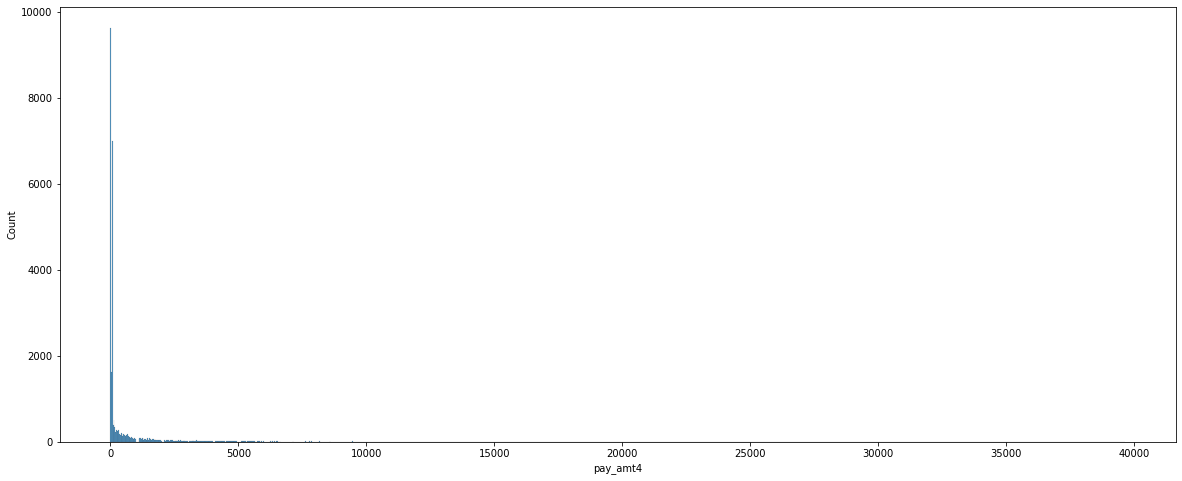

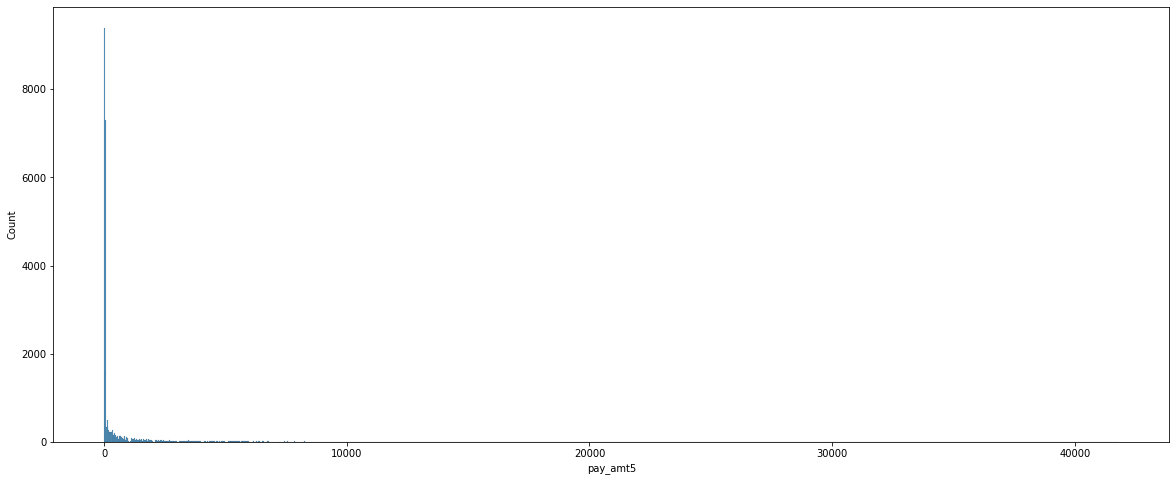

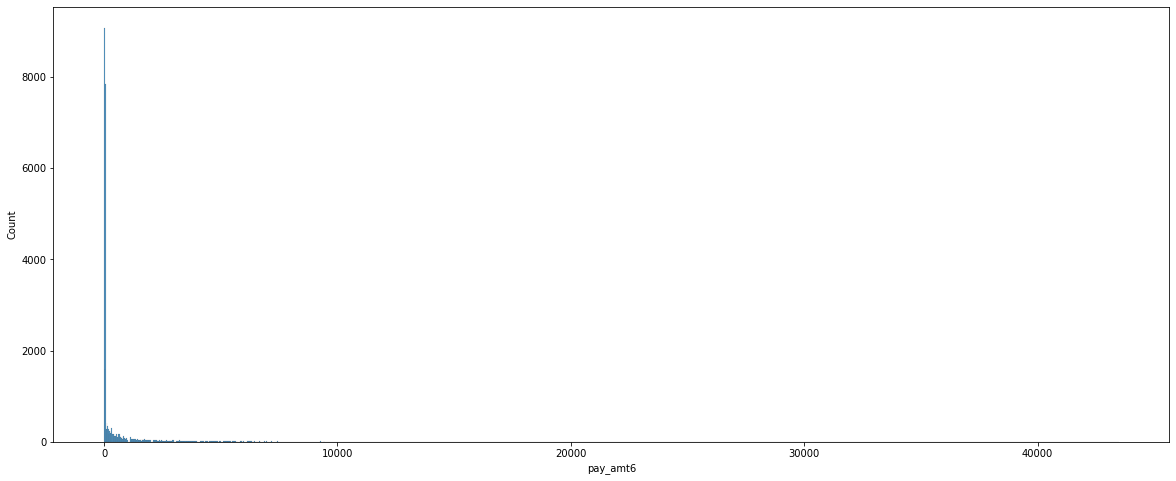

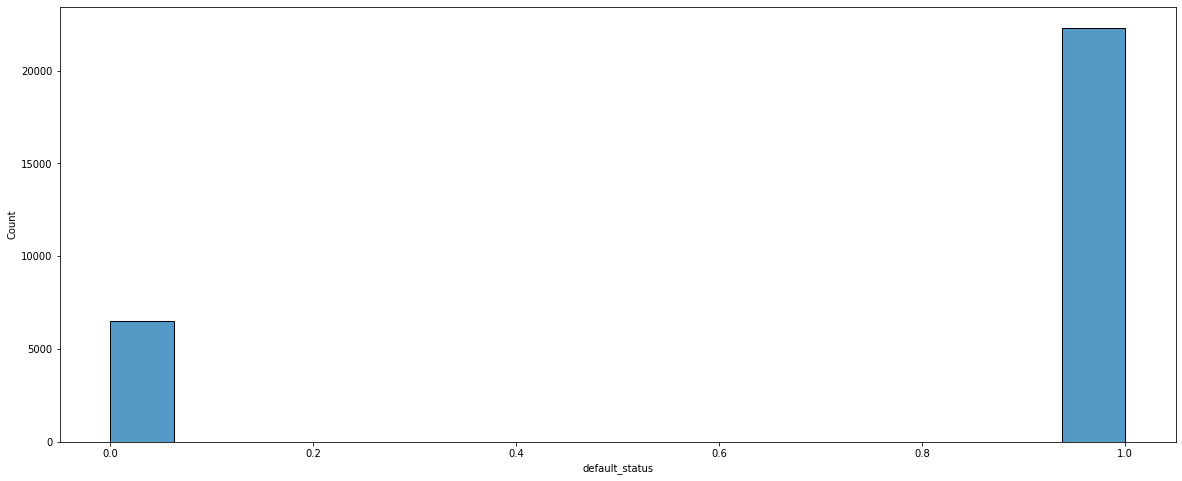

In [ ]:
for i in df2.columns:
  plt.figure(figsize=(20,8))
  sns.histplot(df2[i])
  plt.xlabel(i)  

In [ ]:
l1=[]

for col in df2.columns[2:8]:
  l1.extend(df2[(df2[col]>100000) | (df2[col]<-10000)].index)
len(l1)

12637

In [ ]:
df2.columns

Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'default_status'],
      dtype='object')

In [ ]:
l2=[]

for col in df2.columns[8:14]:
  l2.extend(df2[(df2[col]>5000) | (df2[col]<-10000)].index)
len(l2)

11287

In [ ]:
l3= list(set(l1) | set(l2))
len(l3)

9191

In [ ]:
df4=df2.drop(l3)
df4

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_status
0,2.0,24,3913.0,312.0,689.0,8671.0,8131.5,7819.0,166.0,689.0,119.0,75.0,75.0,78.0,0
1,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,166.0,1.0,1.0,1.0,75.0,2.0,0
2,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,1
3,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,1
5,5.0,37,644.0,5769.0,5768.0,19394.0,19619.0,224.0,25.0,1815.0,657.0,1.0,1.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,21.0,34,25.0,25.0,25.0,25.0,25.0,25.0,166.0,164.0,119.0,75.0,75.0,78.0,0
29992,1.0,43,882.0,14.0,8889.5,8671.0,8131.5,7819.0,2.0,164.0,119.0,75.0,75.0,78.0,1
29994,8.0,34,72557.0,7778.0,79384.0,77519.0,8267.0,81158.0,7.0,35.0,119.0,7.0,75.0,4.0,0
29997,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,166.0,164.0,22.0,42.0,2.0,31.0,0


In [ ]:
df5=df4[df4.age>20]
df5.default_status.value_counts()

1    13329
0     4603
Name: default_status, dtype: int64

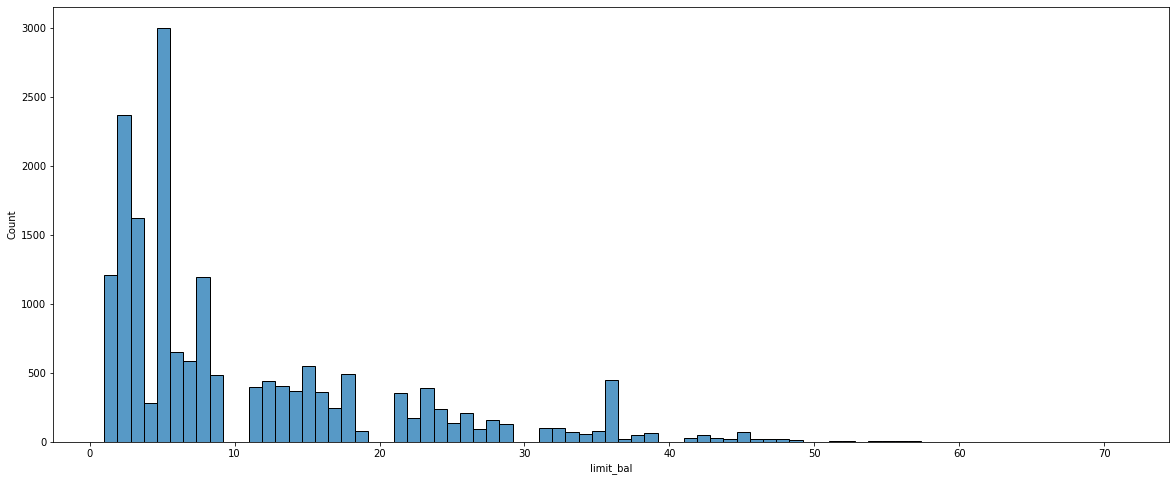

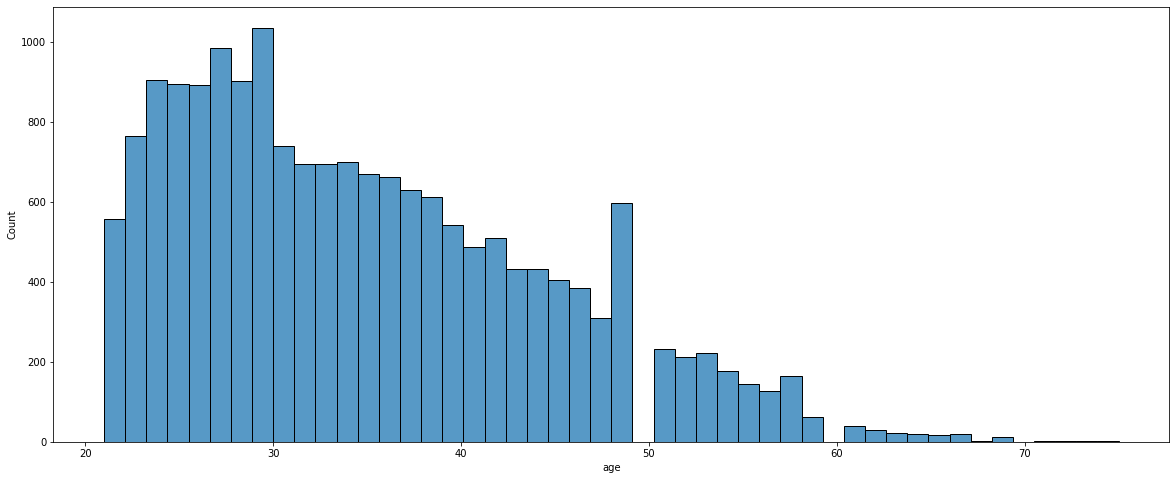

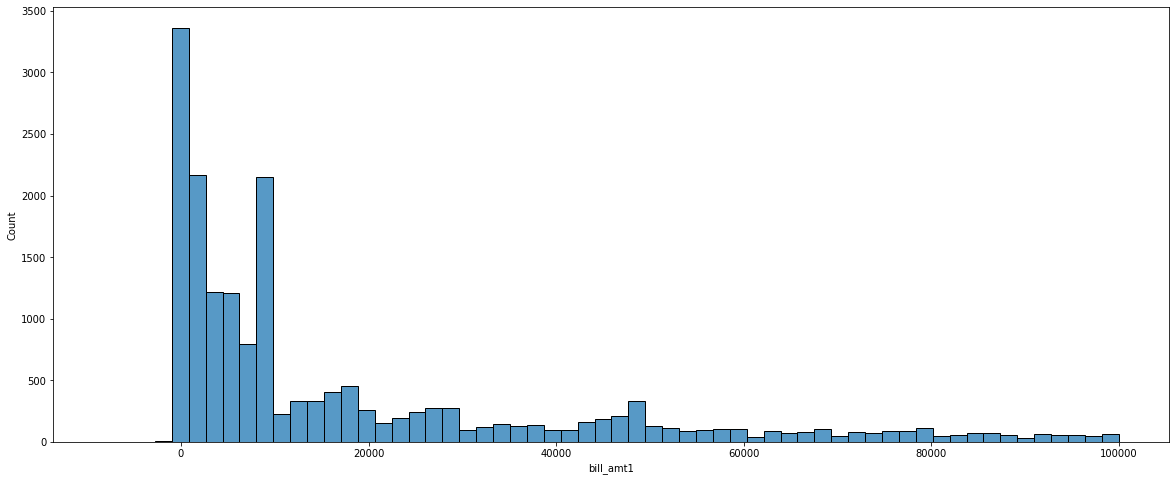

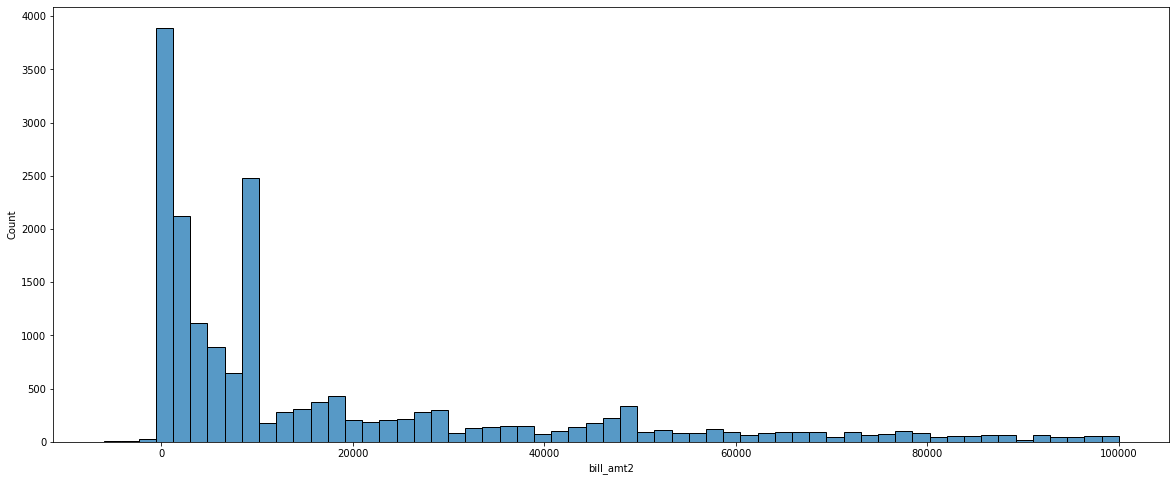

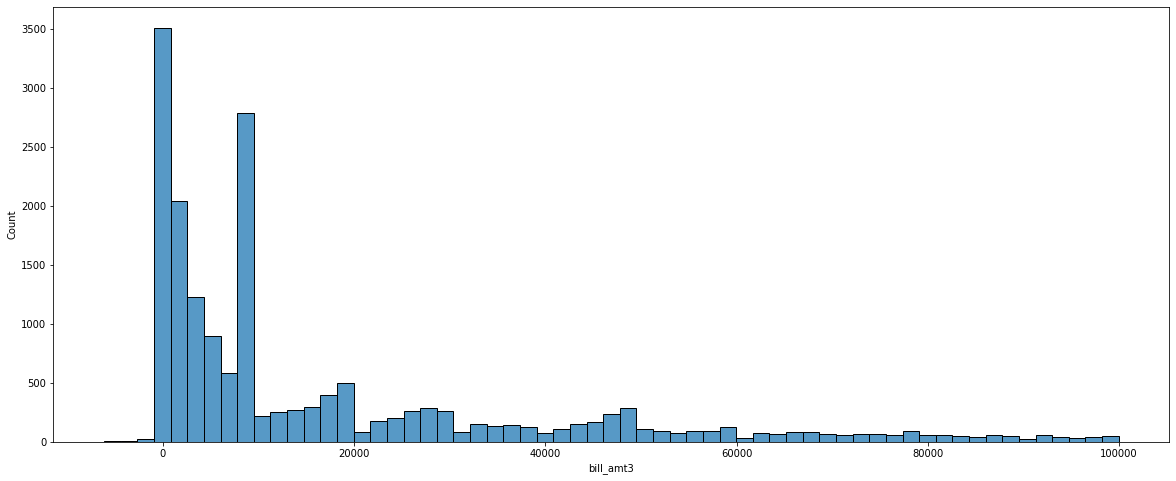

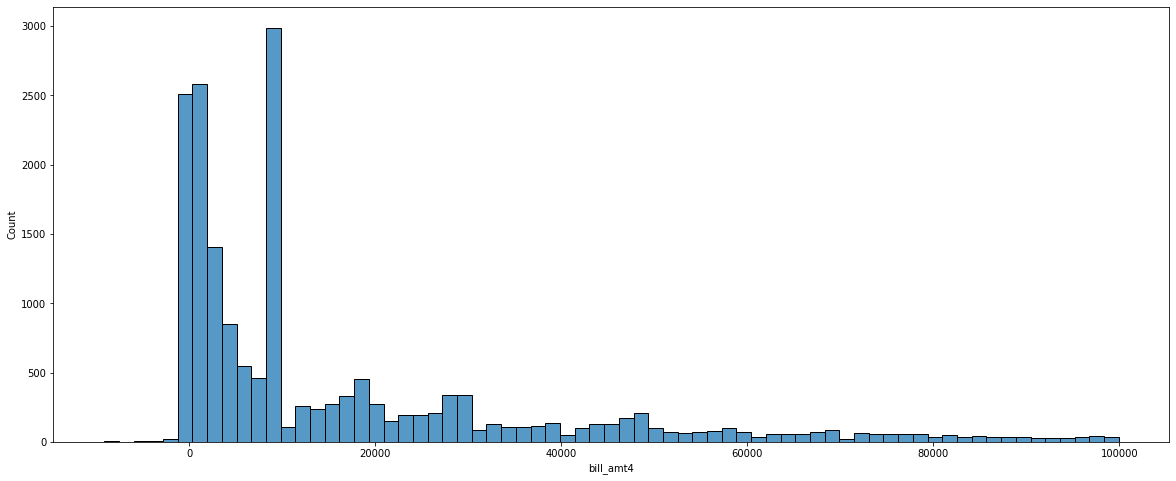

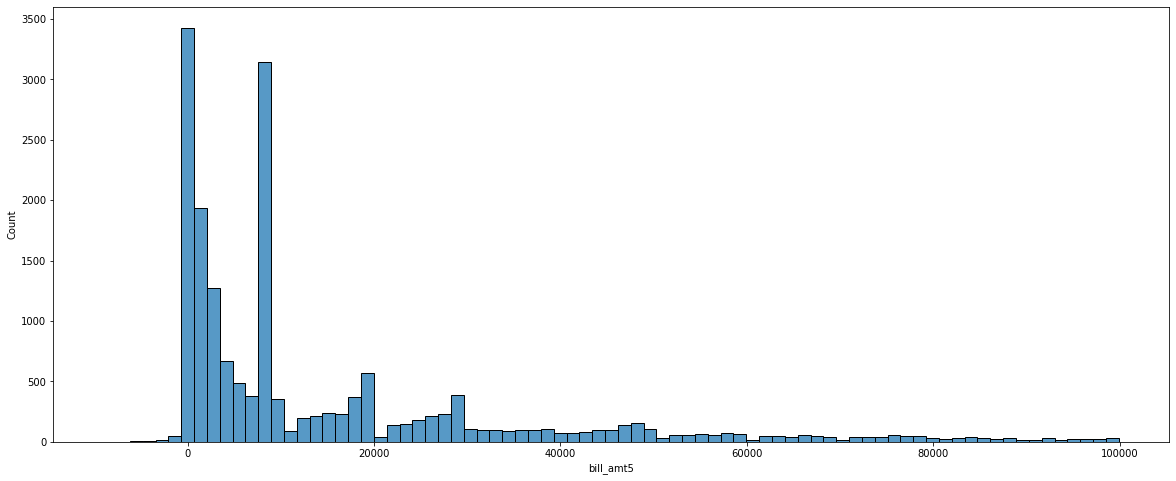

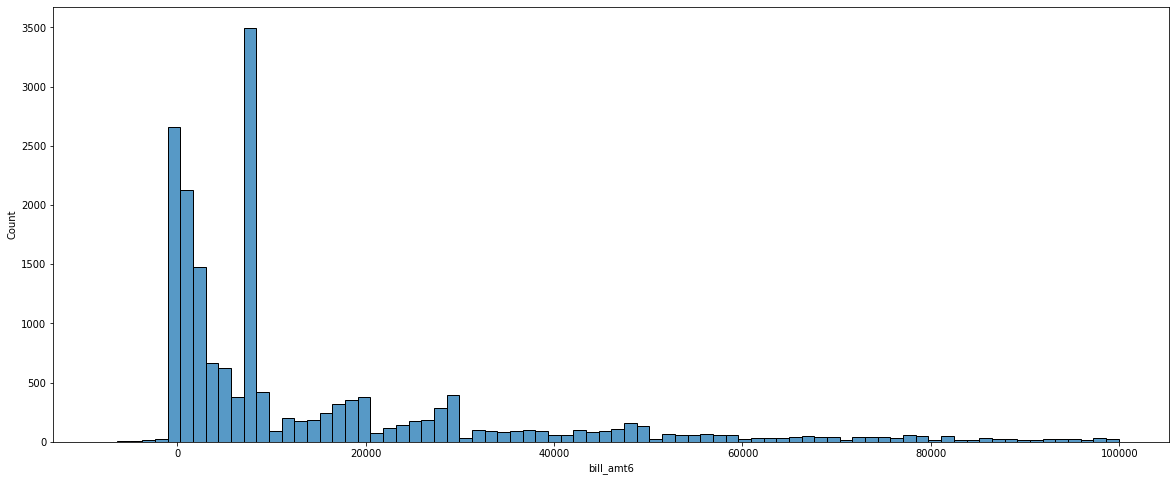

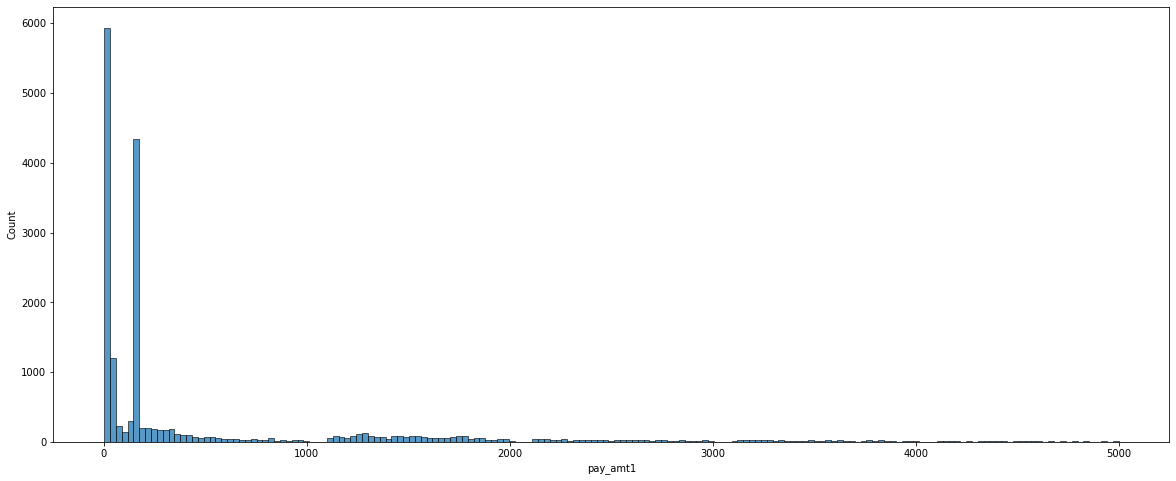

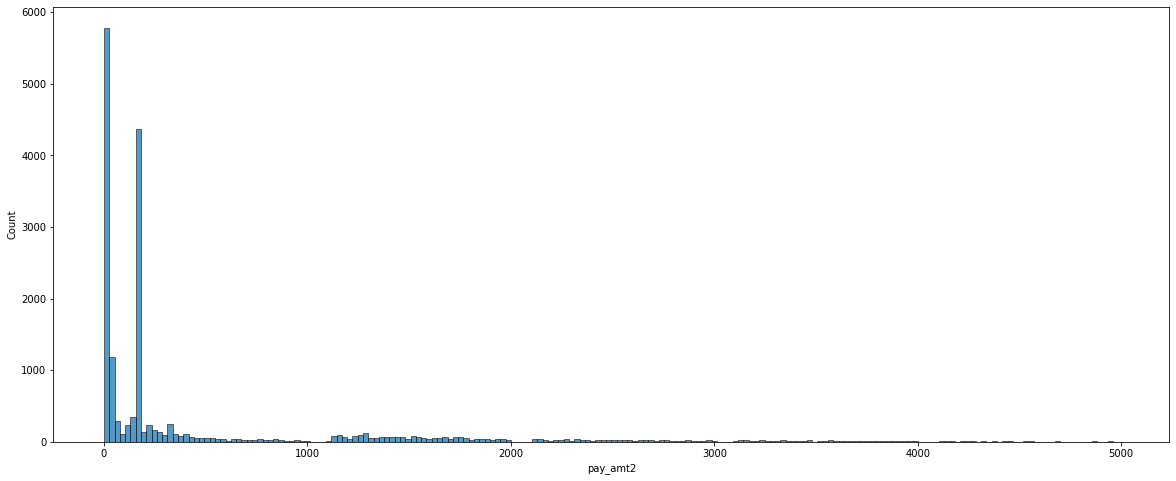

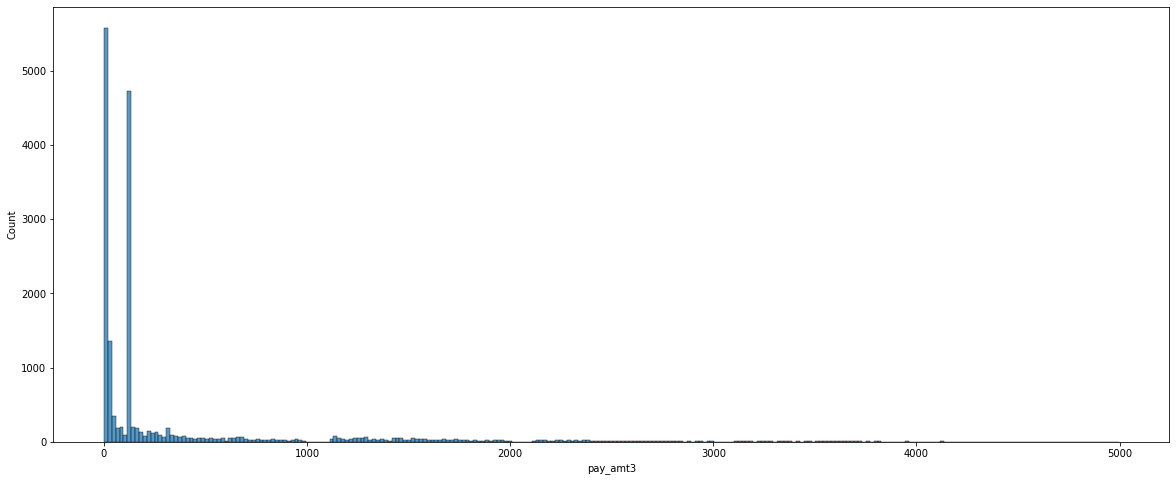

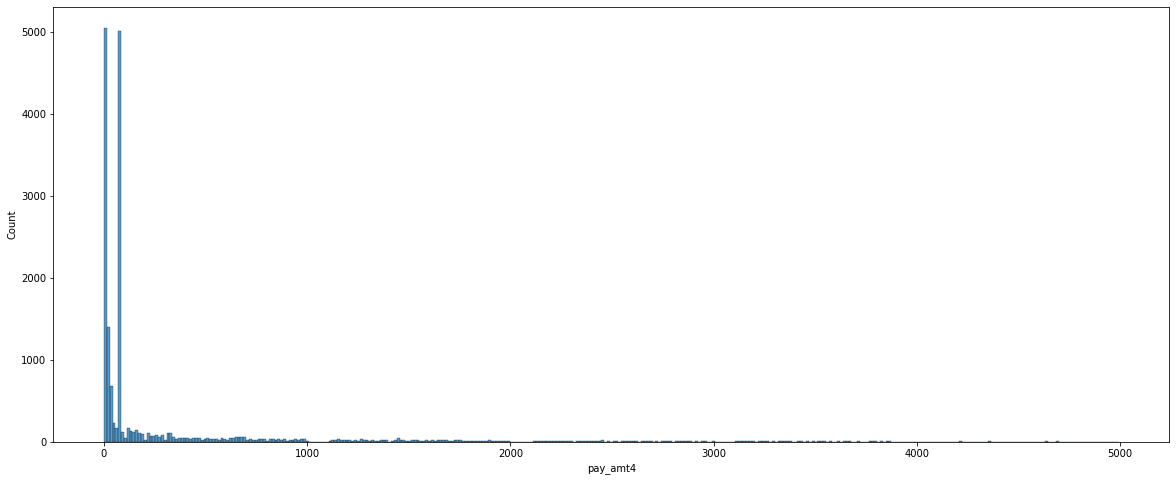

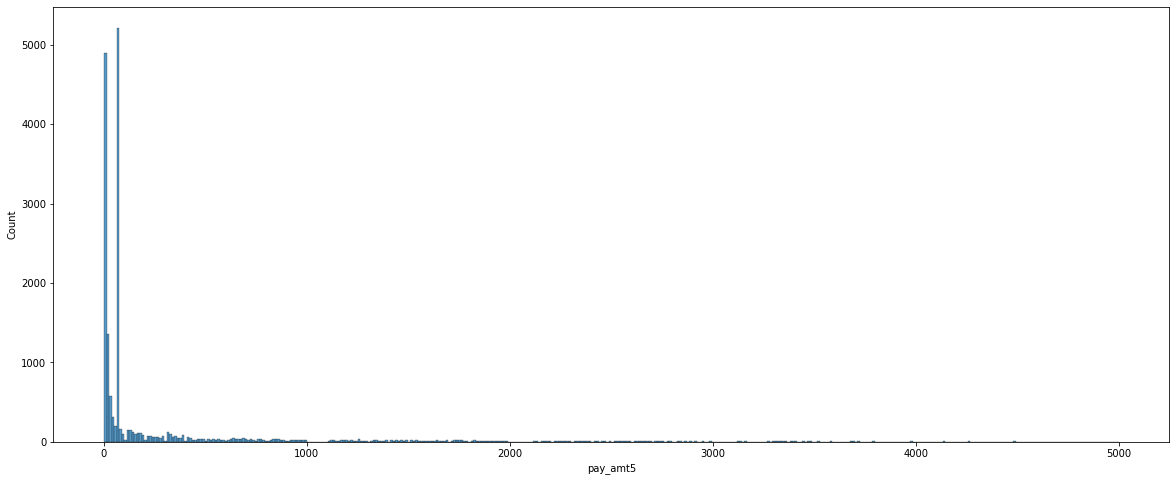

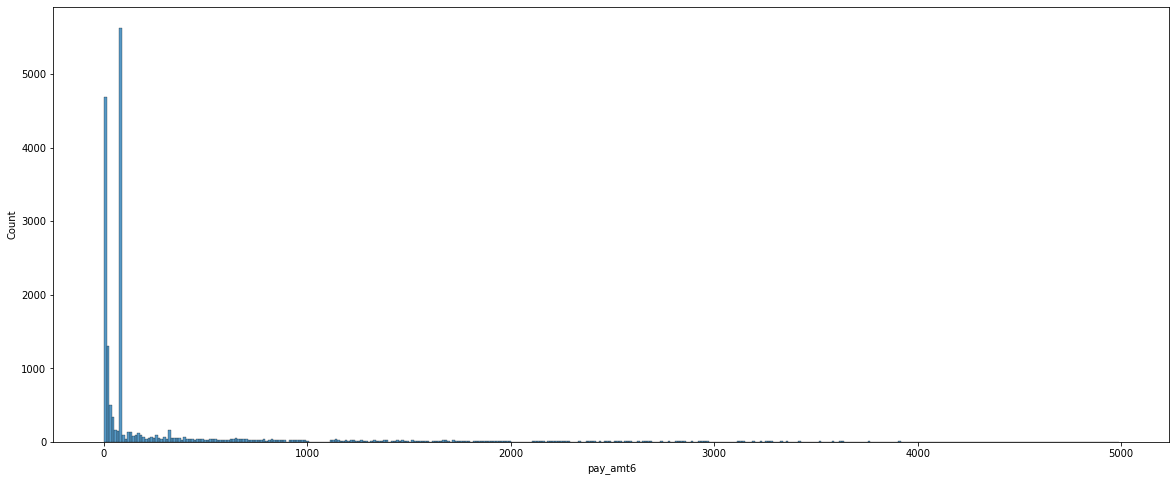

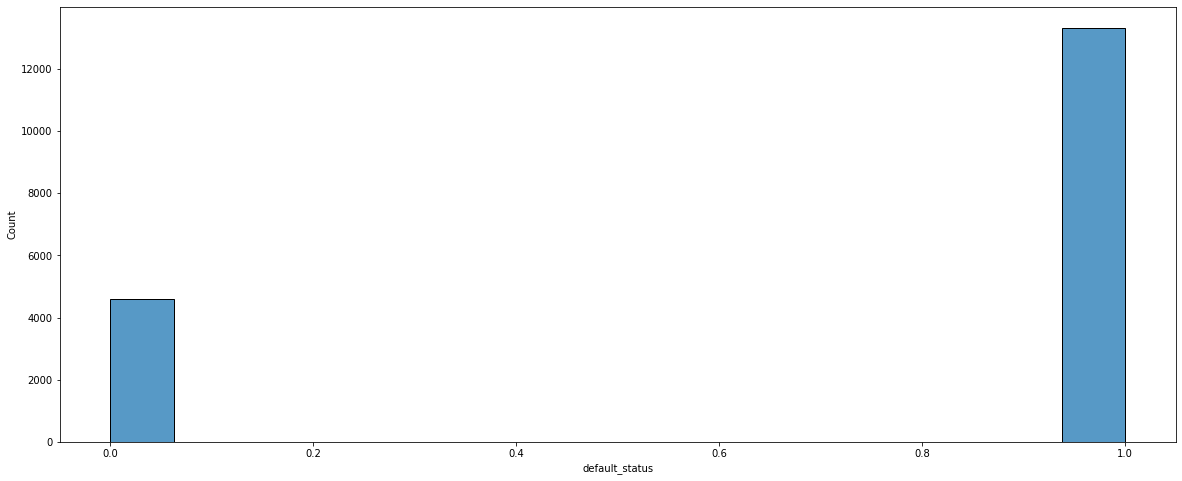

In [ ]:
for i in df5.columns:
  plt.figure(figsize=(20,8))
  sns.histplot(df5[i])
  plt.xlabel(i)  

In [ ]:
dd=df5[df5['default_status']==0]
df6=pd.concat([df5,dd,dd])
df6

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_status
0,2.0,24,3913.0,312.0,689.0,8671.0,8131.5,7819.0,166.0,689.0,119.0,75.0,75.0,78.0,0
1,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,166.0,1.0,1.0,1.0,75.0,2.0,0
2,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,1
3,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,1
5,5.0,37,644.0,5769.0,5768.0,19394.0,19619.0,224.0,25.0,1815.0,657.0,1.0,1.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29982,9.0,36,7752.0,9112.0,136.0,11328.0,1236.0,14329.0,15.0,15.0,15.0,12.0,25.0,78.0,0
29991,21.0,34,25.0,25.0,25.0,25.0,25.0,25.0,166.0,164.0,119.0,75.0,75.0,78.0,0
29994,8.0,34,72557.0,7778.0,79384.0,77519.0,8267.0,81158.0,7.0,35.0,119.0,7.0,75.0,4.0,0
29997,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,166.0,164.0,22.0,42.0,2.0,31.0,0


In [ ]:
# O
x=df5.drop(['default_status'],axis=1)
y=df5['default_status']

In [ ]:
# t
x1=df6.drop(['default_status'],axis=1)
y1=df6['default_status']

In [ ]:
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# t=ss.fit_transform(x)
# x=pd.DataFrame(t,columns=x.columns)
# x

In [ ]:
# Original
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12552, 14), (5380, 14), (12552,), (5380,))

In [ ]:
# test
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((18996, 14), (8142, 14), (18996,), (8142,))

In [ ]:
x_train,y_train=x1_train.copy(),y1_train.copy()

# Model Building

## SVM

Accuracy of the model is:
 0.445724907063197
              precision    recall  f1-score   support

           0       0.28      0.81      0.42      1346
           1       0.83      0.33      0.47      4034

    accuracy                           0.45      5380
   macro avg       0.56      0.57      0.44      5380
weighted avg       0.70      0.45      0.46      5380



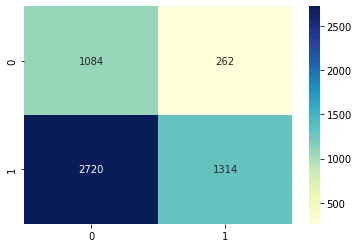

In [ ]:
model=SVC()
model.fit(x_train,y_train)
prd=model.predict(x_test)
print('Accuracy of the model is:\n',accuracy_score(y_test,prd))
cm=confusion_matrix(y_test,prd)
print(classification_report(y_test, prd))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

## KNN

Accuracy of the model is:
 0.65
              precision    recall  f1-score   support

           0       0.40      0.83      0.54      1346
           1       0.91      0.59      0.72      4034

    accuracy                           0.65      5380
   macro avg       0.66      0.71      0.63      5380
weighted avg       0.79      0.65      0.67      5380



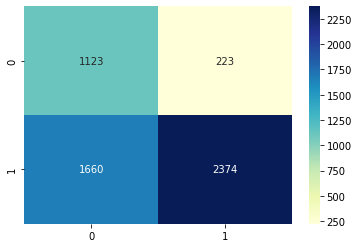

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
prd=model.predict(x_test)
print('Accuracy of the model is:\n',accuracy_score(y_test,prd))
cm=confusion_matrix(y_test,prd)
print(classification_report(y_test, prd))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
test_scores=[]
for i in range (1,30):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  test_scores.append(model.score(x_test,y_test))
print('maximum test score is:',max(test_scores) ,'at the n_neighbors:',test_scores.index(max(test_scores)))

maximum test score is: 0.9094795539033457 at the n_neighbors: 0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


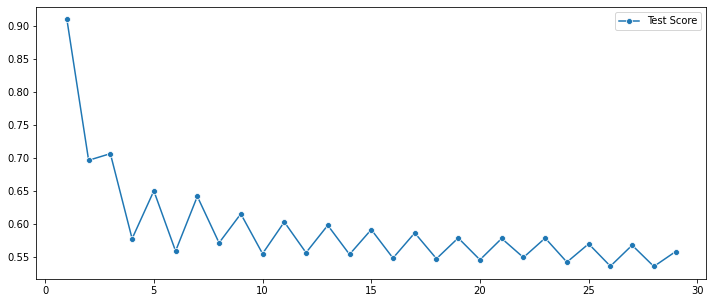

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30),test_scores,marker='o',label='Test Score')

## Naive Bayes

Accuracy of the model is:
 0.45092936802973976
              precision    recall  f1-score   support

           0       0.27      0.73      0.40      1346
           1       0.80      0.36      0.49      4034

    accuracy                           0.45      5380
   macro avg       0.54      0.54      0.45      5380
weighted avg       0.67      0.45      0.47      5380



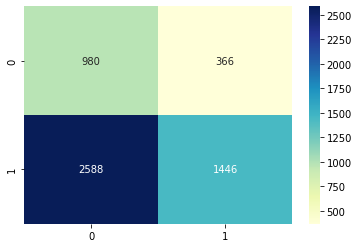

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)
prd=model.predict(x_test)
print('Accuracy of the model is:\n',accuracy_score(y_test,prd))
cm=confusion_matrix(y_test,prd)
print(classification_report(y_test, prd))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

## Decision Tree

In [ ]:
cross_val_score(DecisionTreeClassifier(),x,y,cv=3)

array([0.64034794, 0.64580893, 0.64028777])

Accuracy of the model is:
 0.9191449814126395
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1346
           1       0.99      0.90      0.94      4034

    accuracy                           0.92      5380
   macro avg       0.88      0.94      0.90      5380
weighted avg       0.93      0.92      0.92      5380



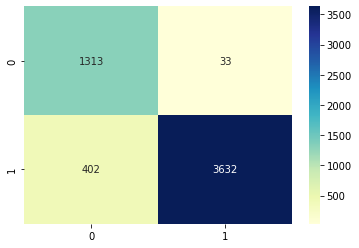

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prd=model.predict(x_test)
print('Accuracy of the model is:\n',accuracy_score(y_test,prd))
cm=confusion_matrix(y_test,prd)
print(classification_report(y_test, prd))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

## Random Forest

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=100),x,y,cv=3)

array([0.7453998 , 0.74937259, 0.74786682])

Accuracy of the model is:
 0.949814126394052
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1346
           1       0.99      0.94      0.97      4034

    accuracy                           0.95      5380
   macro avg       0.92      0.96      0.94      5380
weighted avg       0.96      0.95      0.95      5380



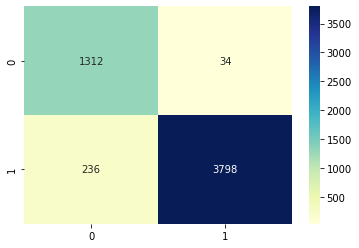

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
prd=model.predict(x_test)
print('Accuracy of the model is:\n',accuracy_score(y_test,prd))
cm=confusion_matrix(y_test,prd)
print(classification_report(y_test, prd))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

## Cross Validation 

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=100),x1,y1,cv=3)

array([0.89265974, 0.89597612, 0.9179748 ])

In [ ]:
clf=GridSearchCV(RandomForestClassifier(),{
    'n_estimators':[100]
},cv=3,return_train_score=False,)
clf.fit(x1,y1)
clf.cv_results_

{'mean_fit_time': array([4.40650137]),
 'mean_score_time': array([0.22619899]),
 'mean_test_score': array([0.90098755]),
 'param_n_estimators': masked_array(data=[100],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.89177537]),
 'split1_test_score': array([0.8966394]),
 'split2_test_score': array([0.91454787]),
 'std_fit_time': array([0.00953263]),
 'std_score_time': array([0.00213633]),
 'std_test_score': array([0.00979205])}

In [ ]:
hv=pd.DataFrame(clf.cv_results_)
hv[['param_n_estimators','mean_test_score','rank_test_score']]

,param_n_estimators,mean_test_score,rank_test_score
0,100,0.900988,1


In [ ]:
clf.best_params_

{'n_estimators': 100}